In [1]:
import pandas as pd
from pathlib import Path
import sys
import plotly.express as px

In [2]:
path = str(Path(sys.path[0]).parent) + '/src/data'
sys.path.append(path)

In [3]:
import_path = str(Path(sys.path[0]).parent) + '/data/raw/'

In [4]:
heats = pd.read_csv(import_path + 'heats.csv')

/Users/kuznetsovnikita/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
cart = pd.read_csv(import_path + 'cart.csv')

In [6]:
goods = pd.read_excel(import_path + 'goods.xlsx')

In [48]:
goods.loc.groupby('')

,Unnamed: 0,id,status,reason,cumdate,selldate,Дата выплаты,comit,Условия договора на товар,Наименование,...,Ответственный,Отправитель,Трек-номер,Статус доставки,В аренду? да/нет,Сколько стоит в аренду,сколько раз было в аренде,сколько денег за аренду всего,Рассчет к выплате,storage
0,0,2000000011233,Архив,Продажа,2019-01-01,2019-12-26,01.01.2020,vlad/sasha,Процент по условиям,Saint Laurent Paris bag Uni black big canvas/...,...,NaN,NaN,NaN,NaN,Нет,3000.0,NaN,NaN,28000.00,NaN
1,1,2000000013039,Архив,Продажа,2019-01-01,2021-11-27,26.11.2021,Чибинов Владислав Владимирович,Процент по условиям,Anchor Necklace,...,Бабич Игорь,NaN,NaN,NaN,Да,2250.0,4.0,1950.0,NaN,NaN
2,3,2000000008714,Архив,Продажа,2019-11-01,2019-11-30,30.11.2019,Чибинов Владислав Владимирович,Процент по условиям,bracelet Uni metal metal/leather bracelet (fu...,...,NaN,NaN,NaN,NaN,Нет,500.0,NaN,NaN,10863.81,NaN
3,5,2000000003801,Архив,Продажа,2019-01-01,2021-02-20,28.02.2021,Чибинов Владислав Владимирович,Процент по условиям,Yellow Detailed Label Collaboration Anorak (x ...,...,Шабанов Тимофей В.,NaN,NaN,NaN,Да,1250.0,NaN,NaN,8400.00,NaN
4,7,2000000013046,Архив,Продажа,2019-01-01,2020-06-08,30.06.2020,Чибинов Владислав Владимирович,Процент по условиям,Black Green Contrast Mix Patched The Greatest ...,...,Муленков Иван,NLD_POSTNL,RU729221081NL,Возвраты,Нет,1500.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12729,17696,2000000141626,Не Архив,Приемка,2022-04-18,NaT,NaN,Гагарин Юрий,Процент по условиям,Black Devil Printed Cotton T Shirt,...,NaN,NaN,NaN,NaN,Нет,NaN,NaN,NaN,NaN,Шоурум
12730,17697,2000000141633,Не Архив,Приемка,2022-04-18,NaT,NaN,Богомолов Андрей Алекссевич,Процент по условиям,Black Shabby Textured Back Zipped Suede Boots,...,NaN,NaN,NaN,NaN,Нет,NaN,NaN,NaN,NaN,Шоурум
12731,17698,2000000141640,Не Архив,Приемка,2022-04-18,NaT,NaN,Богомолов Андрей Алекссевич,Процент по условиям,Black Raw Hem Cotton Blend Sweatpants,...,NaN,NaN,NaN,NaN,Нет,650.0,NaN,NaN,NaN,Шоурум
12732,17699,2000000141657,Не Архив,Приемка,2022-04-18,NaT,NaN,Богомолов Андрей Алекссевич,Процент по условиям,Black Light Wool and Cashmere Coat,...,NaN,NaN,NaN,NaN,Нет,2500.0,NaN,NaN,NaN,Шоурум


In [7]:
heats.product_id = heats.product_id.astype(str).str.strip('.0')

In [8]:
heat_gb = heats.groupby('ym_client_id').agg({'product_id': lambda x: len([i for i in x if i !=''])})

In [9]:
heats.loc[heats.product_id != ''].ym_client_id.nunique()

45967

Text(0, 0.5, 'Процент пользоваетелей')

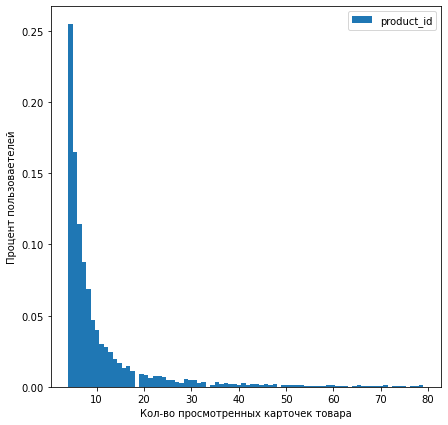

In [10]:
# число просмотров по людям
heat_distr = heat_gb.loc[(heat_gb.product_id > 3)&(heat_gb.product_id < 80)].plot(kind = 'hist', 
                                                                       bins = 80, density =1, figsize = (7,7))
heat_distr.set_xlabel('Кол-во просмотренных карточек товара')
heat_distr.set_ylabel('Процент пользоваетелей')
#     \
# heat_gb.loc[(heat_gb.product_id>0)].value_counts().head(60)

Text(0, 0.5, 'процент активных зарегистрированных пользователей')

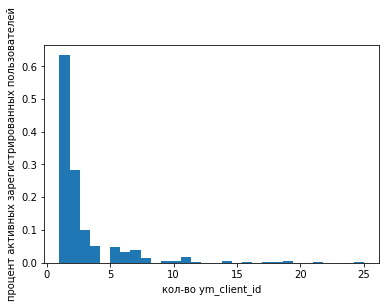

In [24]:
user_heats = heats.loc[heats.user_id!=0].groupby('user_id')['ym_client_id'].apply(lambda x: len(set(x)))
user_heats_plot = user_heats.loc[user_heats<30].plot(
    kind = 'hist', 
    bins = 30,
    density = 1
)
user_heats_plot.set_xlabel('кол-во ym_client_id')
user_heats_plot.set_ylabel('процент активных зарегистрированных пользователей')

Text(0.5, 1.0, 'распределение товаров по числу повторяющихся')

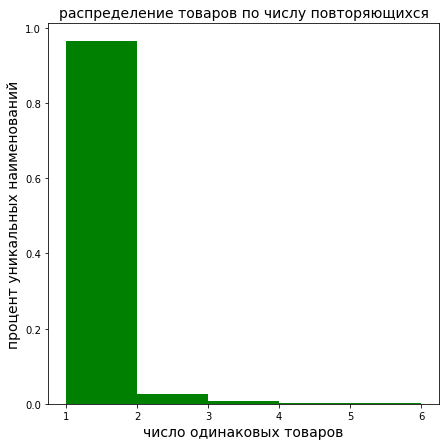

In [87]:
goods_plot = goods.loc[goods.status!='Архив'].groupby('Наименование')['id'].count().plot(
    kind = 'hist', 
    density=1, 
    bins = 5,
    color='g',
    figsize = (7,7),
)
goods_plot.set_xlabel('число одинаковых товаров'  ,  fontsize = 14)
goods_plot.set_ylabel('процент уникальных наименований' ,   fontsize = 14)
goods_plot.set_title('распределение товаров по числу повторяющихся',    fontsize = 14)

Text(0.5, 1.0, 'Группы пользователей')

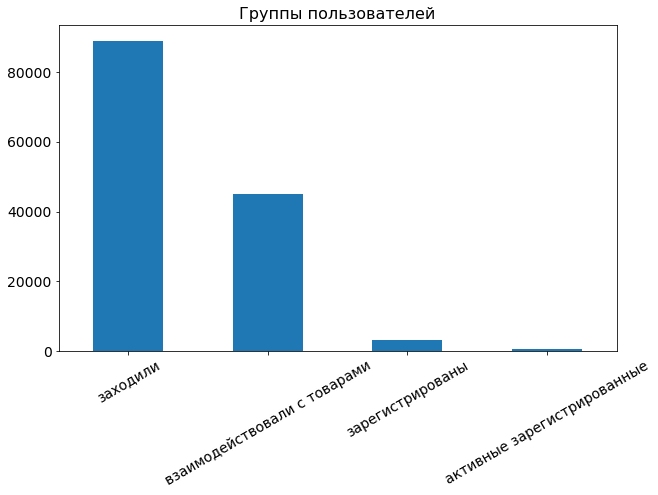

In [81]:
# пользователи: всего заходили - всего зареганных - всего активных зареганных
user_plot = pd.Series([89000,45000,3200,490],
          index=['заходили','взаимодействовали с товарами', 'зарегистрированы','активные зарегистрированные']).plot(kind = 'bar',rot=30, figsize = (10,6), fontsize =14)
user_plot.set_title('Группы пользователей', fontsize = 16)

In [89]:
product_views = heats.loc[heats.product_id != '']

In [90]:
product_views = product_views.merge(goods.loc[:,['status','id','brand', 'categ', 'Группа категорий']], how = 'left', left_on = 'product_id', right_on = 'id')

Text(0, 0.5, 'Просмотров')

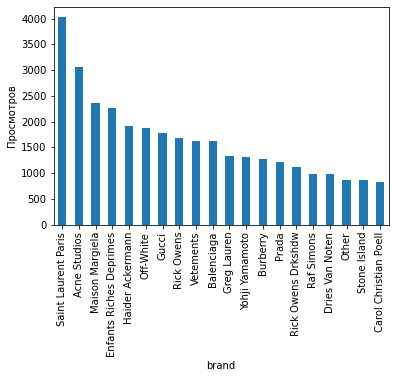

In [91]:
# самые просматриваемые категории и бренды
product_views.loc[product_views.status == 'Не Архив'].groupby('brand')['id'].count().sort_values(ascending = False).head(20).plot(kind = 'bar').set_ylabel('Просмотров')

Text(0, 0.5, 'Просмотров')

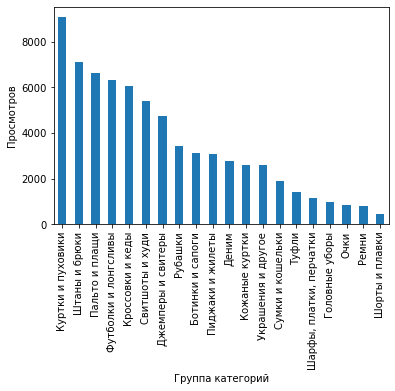

In [92]:
product_views.loc[product_views.status == 
                  'Не Архив'].groupby('Группа категорий')['id'].count().sort_values(
    ascending = False).head(20).plot(kind = 'bar').set_ylabel('Просмотров')

Text(0, 0.5, 'Просмотров')

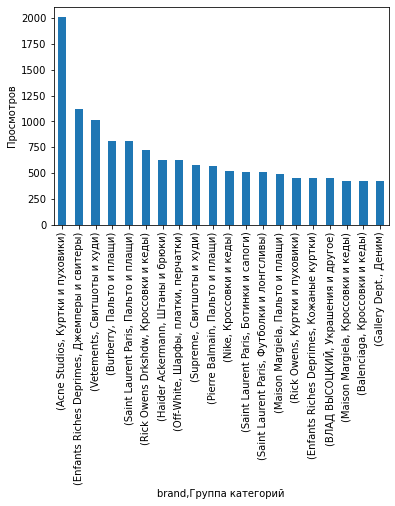

In [93]:
product_views.loc[product_views.status == 
                  'Не Архив'].groupby(['brand','Группа категорий'])['id'].count().sort_values(
    ascending = False).head(20).plot(kind = 'bar').set_ylabel('Просмотров')

In [94]:
product_views.loc[:,'brand_categ'] = list(zip(product_views['brand'], product_views['Группа категорий']))

Text(0, 0.5, 'процент пользователей')

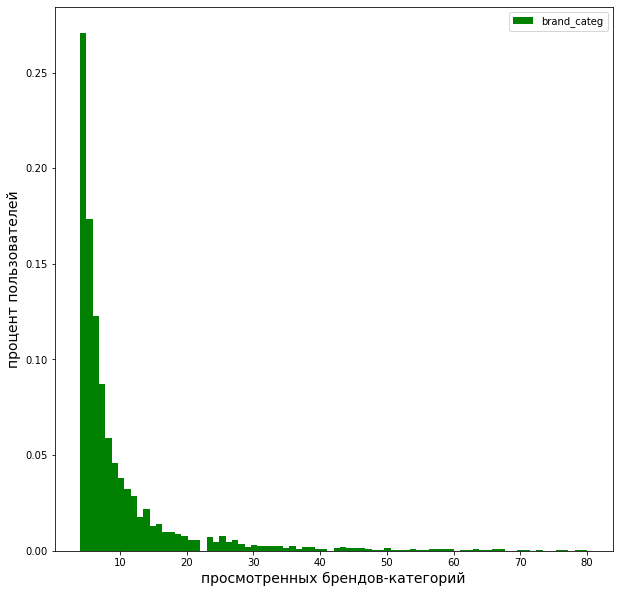

In [123]:
# кол-во просмотренных брендов групп категорий
heat_gb_brand_categ = product_views.groupby('ym_client_id').agg({
    'brand_categ': lambda x: len(set(x))
})
plot2 = heat_gb_brand_categ.loc[(heat_gb_brand_categ.brand_categ > 3)&
                        (heat_gb_brand_categ.brand_categ < 81)].plot(
    kind = 'hist', 
    bins = 80, 
    density =1, 
    figsize = (10,10),
    color = 'g')
plot2.set_xlabel('просмотренных брендов-категорий', fontsize = 14)
plot2.set_ylabel('процент пользователей', fontsize = 14)

In [122]:
cart.product_id = cart.product_id.astype(str).apply(lambda x: x[:-2])

In [127]:
cart.timestamp = pd.to_datetime(cart.timestamp, format = '%Y-%m-%d %H:%M:%S')

In [131]:
cart = cart.loc[cart.timestamp > '2021-10-01']

Text(0, 0.5, 'кол-во пользователей')

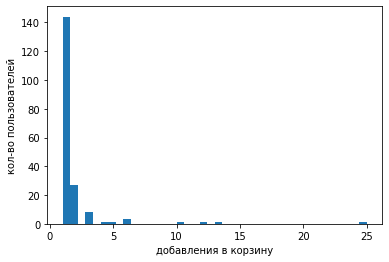

In [169]:
cart_plot = cart.loc[(cart.type == 'C')&(cart.ym_client_id !='')].groupby('ym_client_id')['product_id'].count().plot(
    kind = 'hist', bins = 40, density = 0)
cart_plot.set_xlabel('добавления в корзину')
cart_plot.set_ylabel('кол-во пользователей')

In [160]:
cartsss

type,C,W
0,79.0,NaN
1,NaN,180.0
2,1.0,NaN
3,2.0,NaN
4,1.0,NaN
...,...,...
358,NaN,10.0
359,NaN,1.0
360,2.0,NaN
361,1.0,NaN


In [161]:
cartsss.loc[(cartsss.W < 100)|(cartsss.W.isna())]

type,C,W
0,79.0,NaN
2,1.0,NaN
3,2.0,NaN
4,1.0,NaN
5,1.0,NaN
...,...,...
358,NaN,10.0
359,NaN,1.0
360,2.0,NaN
361,1.0,NaN


TypeError: __init__() got an unexpected keyword argument 'size'

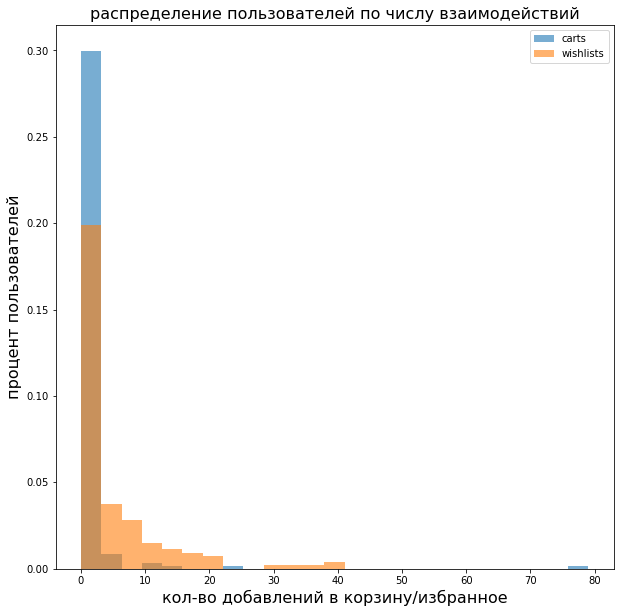

In [175]:
cartsss = cart.loc[(cart.ym_client_id !='')].groupby(['ym_client_id',"type"], as_index=False)['product_id'].count().pivot(
    columns = 'type',
    values = 'product_id'
)
cartsss = cartsss.loc[(cartsss.W < 50)|(cartsss.W.isna())]
cartsss.columns = ['carts','wishlists']
cart_plot = cartsss.plot(
    kind = 'hist',
    alpha = 0.6,
    bins = 25,
    figsize = (10,10),
    density = 1
    
)
cart_plot.margins(0.05)
cart_plot.set_xlabel('кол-во добавлений в корзину/избранное',fontsize = 16) 
cart_plot.set_title('распределение пользователей по числу взаимодействий',fontsize = 16)
cart_plot.set_ylabel('процент пользователей', fontsize = 16)
cart_plot.legend(size =10)

Text(0, 0.5, 'кол-во пользователей')

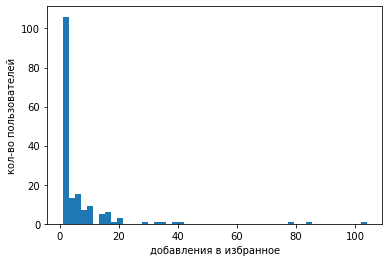

In [167]:
wish_plot = cart.loc[(cart.type == 'W')&(cart.ym_client_id !='')].groupby('ym_client_id')['product_id'].count().plot(
    kind = 'hist', bins = 50, density = 0)
wish_plot.set_xlabel('добавления в избранное')
wish_plot.set_ylabel('кол-во пользователей')

Text(0, 0.5, 'количество зарегистрированных пользователей')

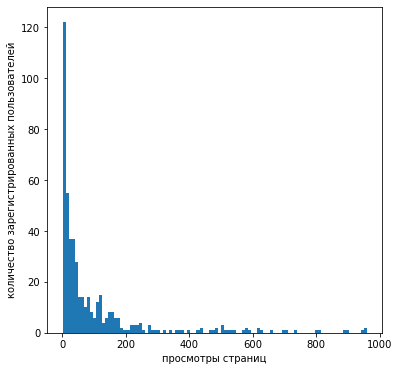

In [220]:
user_visits = heats.loc[heats.user_id != 0].groupby('user_id')['_id'].count()
plotttt = user_visits.loc[user_visits<1000].sort_values().plot(kind = 'hist', figsize = (6,6), bins = 100)
plotttt.set_xlabel('просмотры страниц')
plotttt.set_ylabel('количество зарегистрированных пользователей')

/Users/kuznetsovnikita/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning:

The handle <matplotlib.patches.Rectangle object at 0x7ff03652ef10> has a label of '_id' which cannot be automatically added to the legend.



<AxesSubplot:ylabel='Frequency'>

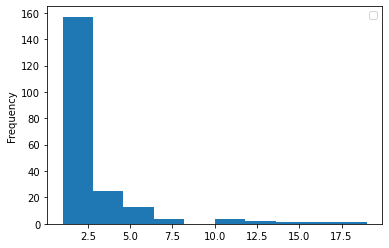

In [217]:
user_visits.to_frame().groupby(user_visits.to_frame()['_id']//1).count().plot(kind = 'hist', bins = 10)

<AxesSubplot:ylabel='доля активных зарегистрированных пользователей'>

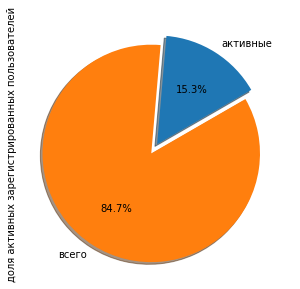

In [199]:
pd.Series([user_visits.shape[0],3197-user_visits.shape[0]], 
          index = ['активные',"всего"],
          name='доля активных зарегистрированных пользователей' ).plot(kind = 'pie', figsize = (5,5),legend=False, \
                   autopct='%1.1f%%',  explode=(0, 0.1),\
                   shadow=True, startangle=30)
                                                                      

In [226]:
total_users = heats.ym_client_id.nunique()
users_with_interactions = heats.loc[heats.product_id != ''].ym_client_id.nunique()
users_with_active_interactions = 30255
users_with_more3_interactions = 3065
test_set = 121
total_users, users_with_interactions, users_with_active_interactions,users_with_more3_interactions, test_set

(90124, 45967, 30255, 3065, 121)

In [182]:
data = dict(
    number=(90124, 45967, 28680, 2818, 121),
    stage=['Всего заходило на сайт (яндекс client_id)',"Заходили на карточку товара", "Из рекомендабельных брендов-категорий","Имели больше трех взаимодействий за две недели до теста","За эти две недели проявляли активность"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [228]:
data_ = dict(
    number=(28680, 2818, 121),
    stage=["Всего пользователей, взаимодействовавших с одним из 531 объектов","Имеют больше трех взаимодействий","За последние две недели проявляли активность"])
fig = px.funnel(data_, x='number', y='stage')
fig.show()